In [210]:
import pandas as pd
import numpy as np
import splusdata
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
idr3updated = pd.read_csv('/home/schwarzam/NN-SPLUS/Tables/iDR3_updated.csv', index_col=0)
idr3zoo2 = pd.read_csv('/home/schwarzam/NN-SPLUS/Tables/idr3zoo2.csv', index_col=0)

idr3zoo2['CLASS'] = pd.Series(np.ones(len(idr3zoo2)))

In [10]:
dfquery1 = splusdata.queryidr3('main3.1', conditions=['RA > 68.1', 'RA < 68.3'], password='idr3splus')
dfquery = dfquery1[0:7000]
dfquery['CLASS'] = pd.Series(np.zeros(len(dfquery)))

getting data...

it may take a minute

Done!


<ipython-input-10-21b9336a509d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfquery['CLASS'] = pd.Series(np.zeros(len(dfquery)))


In [12]:
conc = pd.concat([idr3zoo2, dfquery], ignore_index=True)

In [13]:
conc['CLASS'].value_counts()

1.0    7050
0.0    7000
Name: CLASS, dtype: int64

In [14]:
cols = ['X',
 'Y',
 'ISOarea',
 'MU_MAX',
 'A',
 'B',
 'THETA',
 'ELONGATION',
 'ELLIPTICITY',
 'PhotoFlagDet',
 'CLASS_STAR',
 'FWHM',
 'U_auto',
 'e_U_auto',
 'F378_auto',
 'e_F378_auto',
 'F395_auto',
 'e_F395_auto',
 'F410_auto',
 'e_F410_auto',
 'F430_auto',
 'e_F430_auto',
 'G_auto',
 'e_G_auto',
 'F515_auto',
 'e_F515_auto',
 'R_auto',
 'e_R_auto',
 'F660_auto',
 'e_F660_auto',
 'I_auto',
 'e_I_auto',
 'F861_auto',
 'e_F861_auto',
 'Z_auto',
 'e_Z_auto',
 'nDet_auto',
 'U_aper_3',
 'e_U_aper_3',
 'F378_aper_3',
 'e_F378_aper_3',
 'F395_aper_3',
 'e_F395_aper_3',
 'F410_aper_3',
 'e_F410_aper_3',
 'F430_aper_3',
 'e_F430_aper_3',
 'G_aper_3',
 'e_G_aper_3',
 'F515_aper_3',
 'e_F515_aper_3',
 'R_aper_3',
 'e_R_aper_3',
 'F660_aper_3',
 'e_F660_aper_3',
 'I_aper_3',
 'e_I_aper_3',
 'F861_aper_3',
 'e_F861_aper_3',
 'Z_aper_3',
 'e_Z_aper_3',
 'U_PStotal',
 'e_U_PStotal',
 'F378_PStotal',
 'e_F378_PStotal',
 'F395_PStotal',
 'e_F395_PStotal',
 'F410_PStotal',
 'e_F410_PStotal',
 'F430_PStotal',
 'e_F430_PStotal',
 'G_PStotal',
 'e_G_PStotal',
 'F515_PStotal',
 'e_F515_PStotal',
 'R_PStotal',
 'e_R_PStotal',
 'F660_PStotal',
 'e_F660_PStotal',
 'I_PStotal',
 'e_I_PStotal',
 'F861_PStotal',
 'e_F861_PStotal',
 'Z_PStotal',
 'e_Z_PStotal',
 'U_petro',
 'F378_petro',
 'F395_petro',
 'F410_petro',
 'F430_petro',
 'G_petro',
 'F515_petro',
 'R_petro',
 'F660_petro',
 'I_petro',
 'F861_petro',
 'Z_petro',
 'e_U_petro',
 'e_F378_petro',
 'e_F395_petro',
 'e_F410_petro',
 'e_F430_petro',
 'e_G_petro',
 'e_F515_petro',
 'e_R_petro',
 'e_F660_petro',
 'e_I_petro',
 'e_F861_petro',
 'e_Z_petro']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(conc[cols], conc['CLASS'], test_size=0.3)

In [18]:
from sklearn.linear_model import LogisticRegression 
logis = LogisticRegression(max_iter=20000)
logis.fit(X_train, y_train)

/home/schwarzam/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=20000)

In [19]:
# Make the predictions: 
y_pred2 = logis.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2127
         1.0       0.97      0.98      0.98      2088

    accuracy                           0.98      4215
   macro avg       0.98      0.98      0.98      4215
weighted avg       0.98      0.98      0.98      4215



In [21]:
test = dfquery1[8000:12000]

In [30]:
y_pred2 = logis.predict(test[cols])

In [31]:
for key, x in enumerate(y_pred2):
    if int(x) == 1:
        print(test[key:key+1])

             Field                        ID         RA        DEC          X  \
8002  SPLUS-s27s43  iDR3.SPLUS-s27s43.019787  68.183137 -35.002129  10100.704   

             Y  ISOarea     MU_MAX         A         B  ...  e_F395_petro  \
8002  4627.653       81  16.823235  3.296032  2.940332  ...       0.56689   

      e_F410_petro  e_F430_petro  e_G_petro  e_F515_petro  e_R_petro  \
8002       0.55136      0.329485   0.169574      0.240902   0.117971   

      e_F660_petro  e_I_petro  e_F861_petro  e_Z_petro  
8002      0.113523   0.113528      0.184548   0.208257  

[1 rows x 113 columns]
             Field                        ID         RA        DEC          X  \
8069  SPLUS-s27s43  iDR3.SPLUS-s27s43.023362  68.191534 -34.893595  10061.699   

              Y  ISOarea     MU_MAX         A         B  ...  e_F395_petro  \
8069  5338.4683      176  15.714184  7.267377  4.133562  ...       1.04447   

      e_F410_petro  e_F430_petro  e_G_petro  e_F515_petro  e_R_petro  \
8069   

[1 rows x 113 columns]
             Field                        ID         RA        DEC         X  \
9262  SPLUS-s29s41  iDR3.SPLUS-s29s41.031115  68.166376 -37.338852  4241.906   

              Y  ISOarea     MU_MAX         A         B  ...  e_F395_petro  \
9262  6610.2446       44  16.818121  2.977961  2.190127  ...      2.216895   

      e_F410_petro  e_F430_petro  e_G_petro  e_F515_petro  e_R_petro  \
9262     20.547388      0.334529   0.262241      0.398891   0.099841   

      e_F660_petro  e_I_petro  e_F861_petro  e_Z_petro  
9262      0.152234   0.106635      0.495048   0.218773  

[1 rows x 113 columns]
             Field                        ID         RA        DEC          X  \
9281  SPLUS-s29s41  iDR3.SPLUS-s29s41.032474  68.181936 -37.337326  4160.9023   

              Y  ISOarea     MU_MAX          A          B  ...  e_F395_petro  \
9281  6620.0195      880  15.474265  18.442759  15.796746  ...      0.308192   

      e_F410_petro  e_F430_petro  e_G_petro  e_F515_

[1 rows x 113 columns]
              Field                        ID         RA        DEC  \
10348  SPLUS-s36s36  iDR3.SPLUS-s36s36.039134  68.249231 -46.205002   

               X         Y  ISOarea     MU_MAX         A         B  ...  \
10348  6538.0376  8555.746      136  15.071846  3.876269  3.292711  ...   

       e_F395_petro  e_F410_petro  e_F430_petro  e_G_petro  e_F515_petro  \
10348      19.99101      1.198239      0.319973    0.11938      0.146539   

       e_R_petro  e_F660_petro  e_I_petro  e_F861_petro  e_Z_petro  
10348   0.033047      0.034404   0.027828      0.043333    0.03777  

[1 rows x 113 columns]
              Field                        ID         RA       DEC          X  \
10350  SPLUS-s36s36  iDR3.SPLUS-s36s36.039153  68.181633 -46.20234  6844.3315   

              Y  ISOarea     MU_MAX         A        B  ...  e_F395_petro  \
10350  8572.151       80  16.169954  3.450821  2.30647  ...      0.755317   

       e_F410_petro  e_F430_petro  e_G_petro  e_F5

              Field                        ID         RA        DEC  \
11858  SPLUS-s31s40  iDR3.SPLUS-s31s40.024582  68.199787 -40.110272   

               X          Y  ISOarea     MU_MAX         A         B  ...  \
11858  6942.3213  5677.3735      127  16.295944  4.205289  2.374309  ...   

       e_F395_petro  e_F410_petro  e_F430_petro  e_G_petro  e_F515_petro  \
11858      0.725712      0.560476      0.275731   0.051284      0.129896   

       e_R_petro  e_F660_petro  e_I_petro  e_F861_petro  e_Z_petro  
11858   0.034293      0.035251   0.036233      0.089982    0.06422  

[1 rows x 113 columns]
              Field                        ID         RA        DEC  \
11867  SPLUS-s31s40  iDR3.SPLUS-s31s40.024807  68.268292 -40.118102   

               X          Y  ISOarea     MU_MAX         A         B  ...  \
11867  6599.2573  5627.1025      756  10.755103  3.332324  3.308103  ...   

       e_F395_petro  e_F410_petro  e_F430_petro  e_G_petro  e_F515_petro  \
11867      0.0716

In [33]:
y_pred2
unique, counts = np.unique(y_pred2, return_counts=True)
counts

array([3861,  139])

In [37]:
predicted = pd.DataFrame()

for key, item in enumerate(y_pred2):
    if int(item) == 1:
        topredicted = test[key:key+1]
        predicted = predicted.append(topredicted)

In [189]:
predicted

Field                        ID         RA        DEC  \
8002   SPLUS-s27s43  iDR3.SPLUS-s27s43.019787  68.183137 -35.002129   
8069   SPLUS-s27s43  iDR3.SPLUS-s27s43.023362  68.191534 -34.893595   
8070   SPLUS-s27s43  iDR3.SPLUS-s27s43.023468  68.295286 -34.886116   
8117   SPLUS-s27s43  iDR3.SPLUS-s27s43.025846  68.150968 -34.817309   
8219   SPLUS-s27s43  iDR3.SPLUS-s27s43.030868  68.229115 -34.649630   
...             ...                       ...        ...        ...   
11867  SPLUS-s31s40  iDR3.SPLUS-s31s40.024807  68.268292 -40.118102   
11871  SPLUS-s31s40  iDR3.SPLUS-s31s40.025068  68.170749 -40.094947   
11883  SPLUS-s31s40  iDR3.SPLUS-s31s40.025471  68.204869 -40.083760   
11891  SPLUS-s31s40  iDR3.SPLUS-s31s40.025761  68.262455 -40.073626   
11927  SPLUS-s31s40  iDR3.SPLUS-s31s40.027251  68.135434 -40.034439   

                X          Y  ISOarea     MU_MAX         A         B  ...  \
8002   10100.7040  4627.6530       81  16.823235  3.296032  2.940332  ...   
8069   10061.6990  5338.4683      176  15.714184  7.267377  4.133562  ...   
8070    9505.0000  5391.8647      213  15.409244  5.609611  3.661307  ...   
8117   10283.9470  5835.9250      196  12.586989  2.687419  2.124338  ...   
8219    9872.8590  6937.0700      146  15.292208  3.911720  3.197192  ...   
...           ...        ...      ...        ...       ...       ...  ...   
11867   6599.2573  5627.1025      756  10.755103  3.332324  3.308103  ...   
11871   7088.0490  5777.1900       32  16.961079  2.018929  1.627987  ...   
11883   6917.4360  5850.9890       93  16.571405  4.372516  3.208000  ...   
11891   6629.2134  5918.1504      140  15.900198  3.601803  3.264125  ...   
11927   7266.4480  6172.5810      176  15.926254  4.854918  4.088904  ...   

       e_F395_petro  e_F410_petro  e_F430_petro  e_G_petro  e_F515_petro  \
8002       0.566890      0.551360      0.329485   0.169574      0.240902   
8069       1.044470      0.259750      0.490129   0.095875      0.234219   
8070       0.444148      0.263832      0.248323   0.104545      0.173768   
8117      20.305677     30.860538     13.396113   0.022029     20.574850   
8219       0.241219      1.105459      0.432853   0.085113      0.112991   
...             ...           ...           ...        ...           ...   
11867      0.071678      0.041904      0.031402   0.004815      0.008854   
11871      0.667018      0.549385      0.837825   0.436484      0.971654   
11883      2.772695     20.552372      0.512782   0.167374      0.241085   
11891      0.589060      2.475774      0.373142   0.084731      0.121608   
11927      1.228986      0.356178      0.293756   0.054732      0.114363   

       e_R_petro  e_F660_petro  e_I_petro  e_F861_petro  e_Z_petro  
8002    0.117971      0.113523   0.113528      0.184548   0.208257  
8069    0.057712      0.052577   0.065713      0.110712   0.160312  
8070    0.032354      0.033389   0.030133      0.055332   0.039772  
8117    0.006600     21.611954   0.004126     20.543581   0.004198  
8219    0.030235      0.029259   0.027547      0.048001   0.039017  
...          ...           ...        ...           ...        ...  
11867   0.002116      0.001949   0.001170      0.001683   0.001136  
11871   0.077494      0.084910   0.078142      0.170098   0.112365  
11883   0.071013      0.066430   0.062943      0.136744   0.096104  
11891   0.032283      0.030343   0.038019      0.086792   0.051168  
11927   0.028836      0.030810   0.033078      0.069950   0.052886  

[139 rows x 113 columns]

In [109]:
import cv2
import glob

images = []
arr = []

np.array(arr)
print(arr)
for key, (value, value2) in enumerate(predicted[0:20].iterrows()):
    key=0
    
    im = splusdata.get_img_obj(value2.Field, value2.ID)
    im = np.asarray(im)
    images.append(im)

[]


In [183]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

def show_images(images, cols = 3, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize = (16, 70))
    gs = fig.add_gridspec(7, 4)
    for n, (image, title) in enumerate(zip(images, titles)):
        ax = fig.add_subplot(int(cols), int(np.ceil(n_images/float(cols))), int(n + 1), autoscale_on = True)
        
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [155]:
images = []

for key, (value, value2) in enumerate(predicted[20:40].iterrows()):
    key=0
    
    im = splusdata.get_img_obj(value2.Field, value2.ID)
    im = np.asarray(im)
    images.append(im)

In [184]:
show_images(images, cols = 21/3)

In [202]:
dfquerySat = splusdata.queryidr3('main3.1', conditions=['FWHM > 10', 'R_auto < 14', 'CLASS_STAR > 0.1'], password='idr3splus')
dfquerySat['CLASS'] = pd.Series(np.zeros(len(dfquerySat)))

getting data...

it may take a minute

Done!


In [207]:
nconc = pd.concat([idr3zoo2, dfquerySat], ignore_index=True)

In [204]:
images = []

for key, (value, value2) in enumerate(dfquerySat[40:60].iterrows()):
    key=0
    
    im = splusdata.get_img_obj(value2.Field, value2.ID)
    im = np.asarray(im)
    images.append(im)

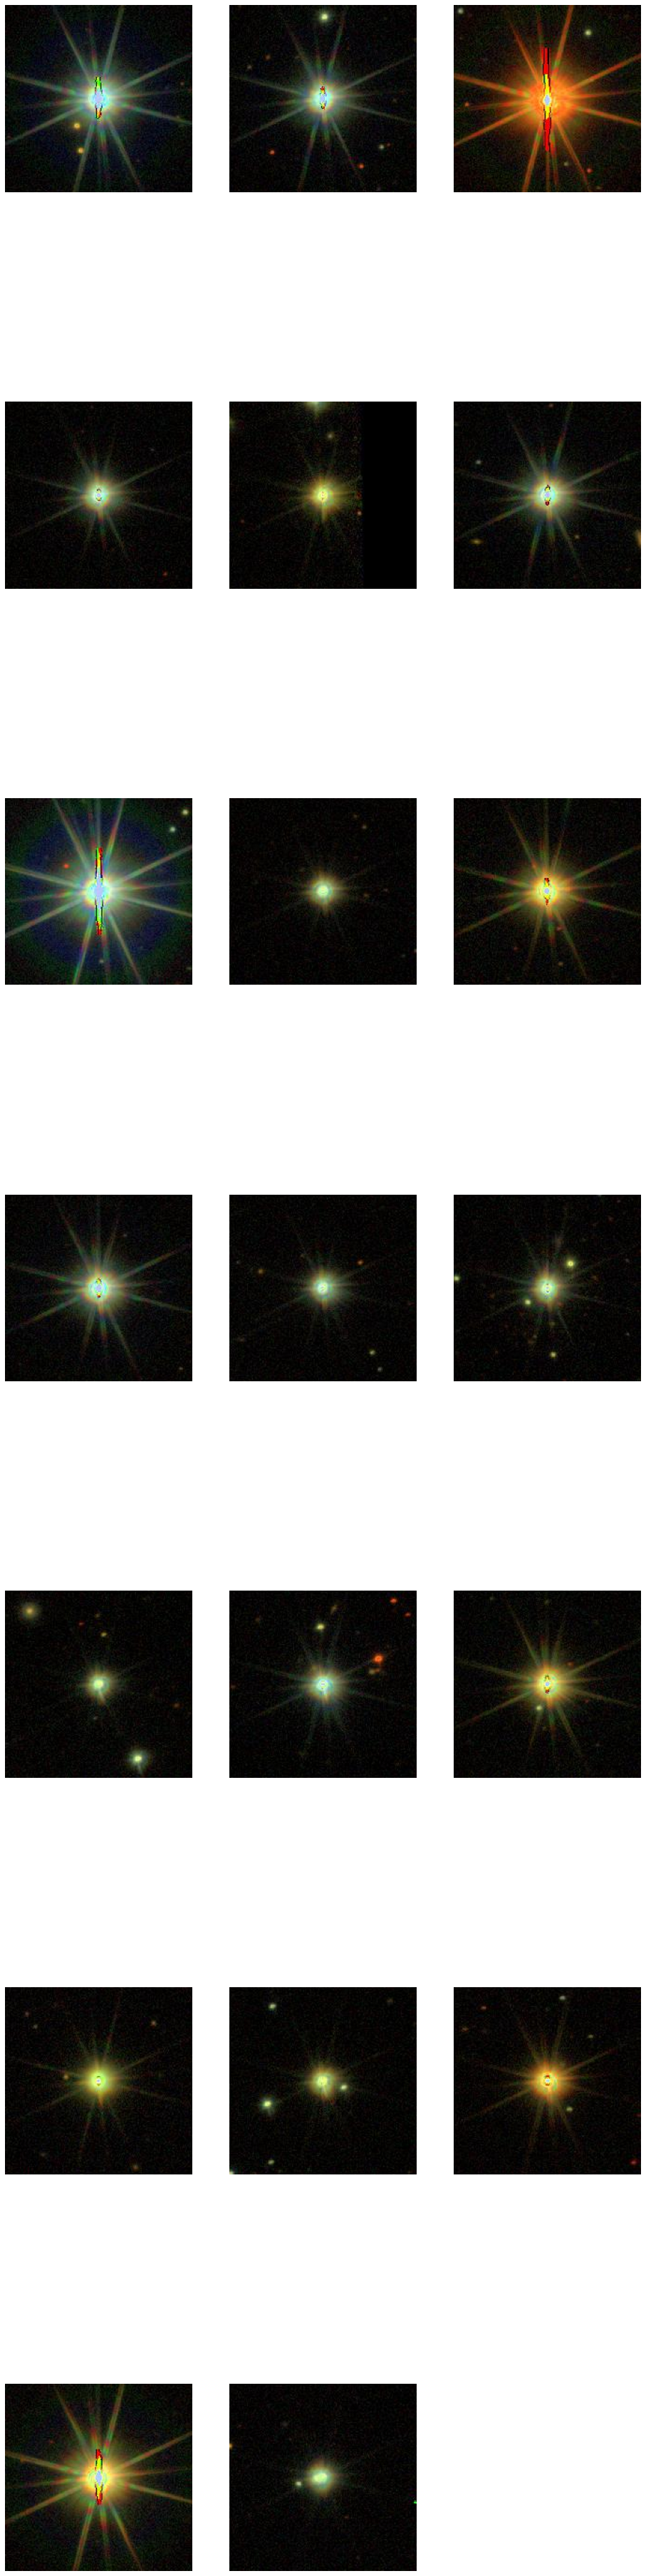

In [205]:
show_images(images, cols = 21/3)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(nconc[cols], nconc['CLASS'], test_size=0.3)

In [209]:
from sklearn.linear_model import LogisticRegression 
logis = LogisticRegression(max_iter=20000)
logis.fit(X_train, y_train)

/home/schwarzam/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=20000)

In [211]:
y_pred2 = logis.predict(X_test)

In [213]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2044
         1.0       1.00      0.99      1.00      2159

    accuracy                           1.00      4203
   macro avg       1.00      1.00      1.00      4203
weighted avg       1.00      1.00      1.00      4203



In [214]:
y_pred2 = logis.predict(predicted[cols])

In [216]:
unique, counts = np.unique(y_pred2, return_counts=True)
counts

array([ 18, 121])

In [226]:
predicted = None
predicted = pd.DataFrame()

for key, item in enumerate(y_pred2):
    if int(item) == 0:
        topredicted = test[key:key+1]
        predicted = predicted.append(topredicted)

In [229]:
predicted

Field                        ID         RA        DEC          X  \
8010  SPLUS-s27s43  iDR3.SPLUS-s27s43.020260  68.213515 -35.002439   9937.794   
8012  SPLUS-s27s43  iDR3.SPLUS-s27s43.020396  68.243912 -34.983073   9775.809   
8019  SPLUS-s27s43  iDR3.SPLUS-s27s43.020820  68.188843 -34.969566  10071.922   
8021  SPLUS-s27s43  iDR3.SPLUS-s27s43.020979  68.200927 -34.968508  10007.154   
8043  SPLUS-s27s43  iDR3.SPLUS-s27s43.022326  68.209793 -34.921711   9962.137   
8047  SPLUS-s27s43  iDR3.SPLUS-s27s43.022469  68.205343 -34.915087   9986.383   
8049  SPLUS-s27s43  iDR3.SPLUS-s27s43.022538  68.205732 -34.916418   9984.224   
8070  SPLUS-s27s43  iDR3.SPLUS-s27s43.023468  68.295286 -34.886116   9505.000   
8072  SPLUS-s27s43  iDR3.SPLUS-s27s43.023504  68.193145 -34.887506  10053.391   
8078  SPLUS-s27s43  iDR3.SPLUS-s27s43.023724  68.219174 -34.871954   9914.456   
8099  SPLUS-s27s43  iDR3.SPLUS-s27s43.025029  68.240149 -34.833737   9803.808   
8111  SPLUS-s27s43  iDR3.SPLUS-s27s43.025523  68.298581 -34.818859   9490.565   
8112  SPLUS-s27s43  iDR3.SPLUS-s27s43.025529  68.153509 -34.817811  10270.265   
8115  SPLUS-s27s43  iDR3.SPLUS-s27s43.025641  68.154299 -34.814720  10266.198   
8116  SPLUS-s27s43  iDR3.SPLUS-s27s43.025778  68.266569 -34.811812   9662.959   
8120  SPLUS-s27s43  iDR3.SPLUS-s27s43.026146  68.211191 -34.808078   9960.791   
8134  SPLUS-s27s43  iDR3.SPLUS-s27s43.026953  68.222940 -34.778792   9899.209   
8135  SPLUS-s27s43  iDR3.SPLUS-s27s43.027065  68.193889 -34.775012  10055.621   

              Y  ISOarea     MU_MAX         A         B  ...  e_F395_petro  \
8010  4626.9990      461  11.298924  3.061107  2.831125  ...      0.012925   
8012  4755.0910       20  16.272968  1.508607  1.280747  ...      0.325934   
8019  4841.0664       21  16.075600  1.515164  1.280746  ...     46.601440   
8021  4848.5400      157  12.998064  2.325612  2.168912  ...      0.630121   
8043  5155.2560       29  15.650486  1.696378  1.402985  ...     20.305677   
8047  5198.4136       54  15.109674  2.073937  1.894818  ...     20.305677   
8049  5189.7190      275  12.022224  2.671574  2.559816  ...      0.041183   
8070  5391.8647      213  15.409244  5.609611  3.661307  ...      0.444148   
8072  5378.3984      242  12.427910  3.476984  2.951356  ...      0.520779   
8078  5481.3623       24  15.972693  1.706407  1.366802  ...      0.269574   
8099  5732.4326       71  16.260887  2.670330  2.476052  ...      1.096080   
8111  5832.2350       56  15.841568  2.071020  1.996887  ...      0.199232   
8112  5832.7630        6  18.178774  2.128611  1.362013  ...      0.237539   
8115  5853.0303       42  15.257242  1.812099  1.669430  ...      1.865292   
8116  5877.0605       34  16.602037  2.167308  1.817368  ...      0.332536   
8120  5899.1260      305  11.897659  2.852250  2.658378  ...      0.052692   
8134  6091.3410       53  14.524808  1.826500  1.676117  ...     20.305677   
8135  6114.7856       26  16.639029  1.870565  1.585138  ...      0.442494   

      e_F410_petro  e_F430_petro  e_G_petro  e_F515_petro  e_R_petro  \
8010      0.009299      0.008533   0.002984      0.005219   0.002011   
8012      0.218406      0.226116   0.142227      0.207078   0.078206   
8019      1.330363      0.924195   0.407043      0.386607   0.114020   
8021      0.209233      0.189314   0.023044      0.043615   0.007177   
8043      0.651415     20.333748   0.440417      5.488630   0.100751   
8047      0.389727      0.454387   0.116225      0.253441   0.041599   
8049      0.022556      0.018798   0.005299      0.009466   0.002985   
8070      0.263832      0.248323   0.104545      0.173768   0.032354   
8072      0.316889      0.342477   0.044762      0.066640   0.012278   
8078      0.326182      0.249349   0.083705      0.169578   0.052175   
8099      1.030174      0.550324   0.236778      0.202825   0.064418   
8111      0.150429      0.137403   0.049818      0.091508   0.034268   
8112      0.669021      1.118964  21.472977      0.522

In [233]:
images = []
for key, (value, value2) in enumerate(predicted[0:40].iterrows()):
    key=0
    im = splusdata.get_img_obj(value2.Field, value2.ID)
    im = np.asarray(im)
    images.append(im)

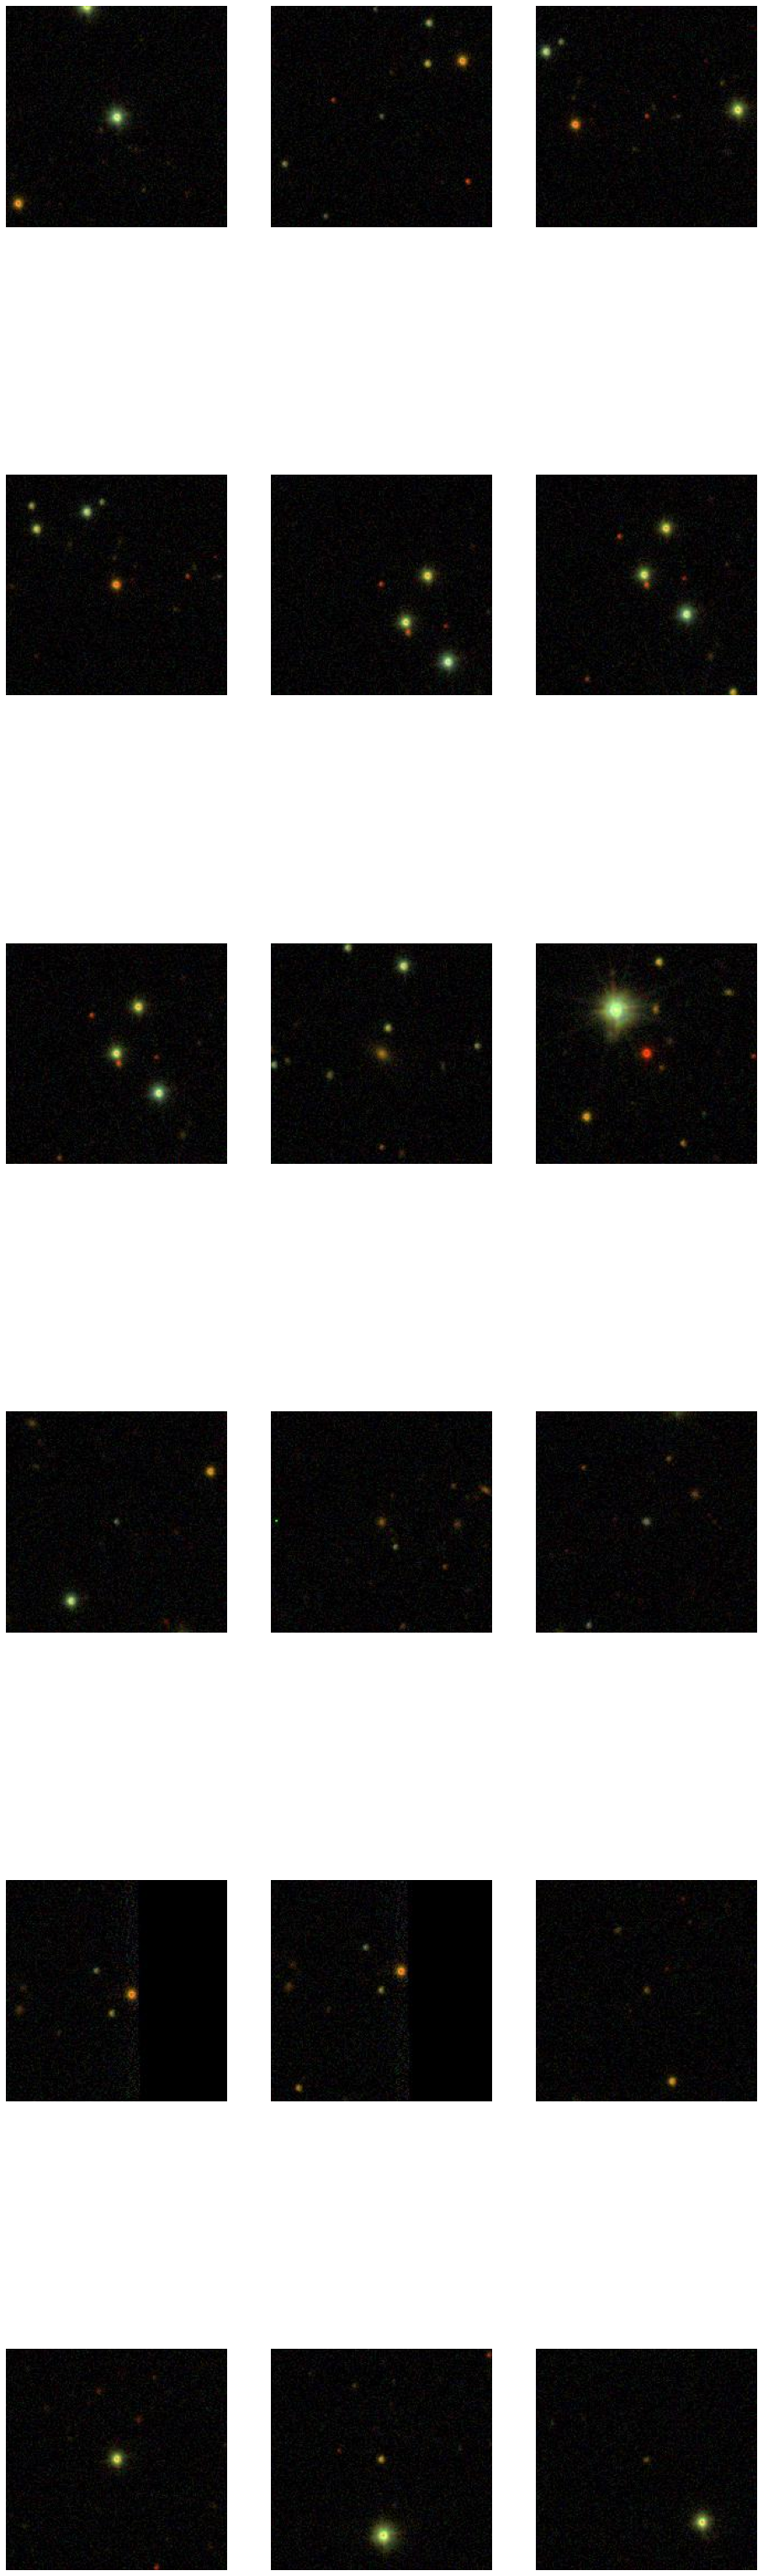

In [234]:
show_images(images, cols = 21/3)